## CMU-UMD COVID-19 Symptom Survey through Facebook

### <font color='#045FB4'> Exploratory Data Analysis (EDA) Version 1.0</font>

***
This voluntary survey is part of a research study led by the Delphi group at Carnegie Mellon University. The data  captured does not include any personally identifiable information and answers to all questions will remain confidential. Published results will be in aggregate and will not identify individual participants or their responses.
***

### <font color='#045FB4'>Content</font><br>
<font size=3>
    
1. [Downloading data](#1)<br><br>

1. [Waves 1-3: Basic quality check](#2)
    * [Survey item response](#3)
    * [Survey weights](#4)
    * [Continuous variables](#5)<br><br>
    
1. [Waves 1-3: Tabulations](#6)
    * [Tabulation by item](#7)
    * [Cross tabulations](#8)<br><br>

1. [Waves 1-3: Trends](#9)<br><br>

1. [Key messages](#10)<br><br>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.rcParams['axes.axisbelow'] = True
from utils import *

<a id="1"></a><br>
## <font color='#045FB4'>1. Downloading data</font>

#### Step 1
a. Storing 'incremental' data file names from the 'data' subdirectory in a list. <br>
b. Eliminating 22 files from the list which failed to uncompress due to error. Of 1,713 incremental data files available, 22 files were giving an error ('unexpected end of file') when trying to uncompress.

**Note**: Check with FB COVID Survey group on the possibly corrupted files

In [2]:
PATH = '../data/'
list_of_files = sorted(os.listdir(PATH))
list_of_files = [file for file in list_of_files if file[-2:] != 'gz']

#### Step 2
According to the documentation on [Response Files](https://cmu-delphi.github.io/delphi-epidata/symptom-survey/survey-files.html): <br>
<blockquote>Every day, we write response files for all recent days of data, with today’s recorded date. You need only load the most recent set of recorded files to obtain all survey responses; the older versions are available to track any changes in file formats or slight changes from late-arriving responses, as described in the lag policy below</blockquote><br>
Based on the above text, the next block of code retains only the latest recorded file for each date.

In [3]:
x = [(file[15:25], file[-14:-4]) for file in list_of_files]
d = pd.DataFrame(x, columns =['ford', 'recorded'])
final_list_of_files = []
for f in d.ford.unique():
    rec_max = d.loc[d.ford==f, 'recorded'].max()
    temp = 'cvid_responses_' + f + '_recordedby_' + rec_max + '.csv'
    final_list_of_files.append(temp)

#### Step 3
Appending all the files to create one dataset using the user-defined function (append_files).

In [4]:
df = append_files(PATH, final_list_of_files)

#### Step 4
Ensuring the date variables are appropriately stored and not as strings. Also, creating two new variables 'StartDate' and 'EndDate' which extract only the date and eliminate the time.

In [5]:
df['StartDatetime'] = pd.to_datetime(df['StartDatetime'], errors='coerce', utc=True)
df['EndDatetime'] = pd.to_datetime(df['EndDatetime'], errors='coerce', utc=True)

In [6]:
df['StartDate'] = df['StartDatetime'].dt.date
df['EndDate'] = df['EndDatetime'].dt.date

#### Summarizing dataframe

In [7]:
df.head()

,StartDatetime,EndDatetime,A1_1,A1_2,A1_3,A1_4,A1_5,A2,A2b,A3,...,Q77,Q78,Q79,Q80,D10,C16,C17,E3,StartDate,EndDate
0,2020-04-06 07:44:28+00:00,2020-04-06 07:47:33+00:00,2.0,2.0,2.0,2.0,2.0,NaN,6.0,07002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-06,2020-04-06
1,2020-04-06 07:44:28+00:00,2020-04-06 07:47:54+00:00,2.0,2.0,2.0,2.0,2.0,NaN,4.0,55105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-06,2020-04-06
2,2020-04-06 07:44:29+00:00,2020-04-06 07:48:05+00:00,2.0,1.0,2.0,2.0,2.0,2.0,3.0,91607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-06,2020-04-06
3,2020-04-06 07:44:29+00:00,2020-04-06 07:49:14+00:00,2.0,1.0,1.0,1.0,1.0,2.0,2.0,16415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-06,2020-04-06
4,2020-04-06 07:44:31+00:00,2020-04-06 08:01:02+00:00,2.0,2.0,2.0,2.0,2.0,NaN,1.0,19904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-06,2020-04-06


In [8]:
df_stats(df)

Total number of responses: 14146070
Range of dates is from 2020-04-06 to 2020-12-08
This dataframe includes waves: ['1.0', '2.0', '3.0', '4.0', '5.0', 'NA']


In [9]:
num_res = df['EndDate'].groupby(df['StartDate']).count()

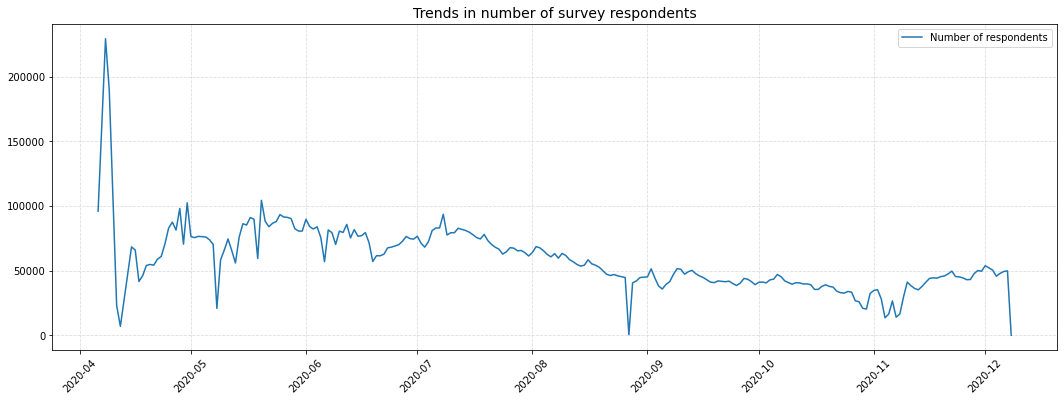

In [10]:
plt.figure(figsize=(18,6))
plt.plot(num_res.index, num_res.values, label='Number of respondents')
plt.xticks(rotation=45)
plt.legend()
plt.title('Trends in number of survey respondents', fontsize=14)
plt.grid(b=True, which='major', color='#DDD', linestyle='--')
plt.show()

***
Interest in the survey seems to be waning
***

In [11]:
print(f'Range of dates for Wave 1 is from {df.loc[df.wave==1].StartDate.min()} to {df.loc[df.wave==1].StartDate.max()}')
print(f'Range of dates for Wave 2 is from {df.loc[df.wave==2].StartDate.min()} to {df.loc[df.wave==2].StartDate.max()}')
print(f'Range of dates for Wave 3 is from {df.loc[df.wave==3].StartDate.min()} to {df.loc[df.wave==3].StartDate.max()}')
print(f'Range of dates for Wave 4 is from {df.loc[df.wave==4].StartDate.min()} to {df.loc[df.wave==4].StartDate.max()}')
print(f'Range of dates for Wave 5 is from {df.loc[df.wave==5].StartDate.min()} to {df.loc[df.wave==5].StartDate.max()}')
print(f'Range of dates for Wave NA is from {df.loc[df.wave.isna()].StartDate.min()} to {df.loc[df.wave.isna()].StartDate.max()}')

Range of dates for Wave 1 is from 2020-04-06 to 2020-08-03
Range of dates for Wave 2 is from 2020-04-15 to 2020-11-30
Range of dates for Wave 3 is from 2020-05-22 to 2020-12-08
Range of dates for Wave 4 is from 2020-09-08 to 2020-12-08
Range of dates for Wave 5 is from 2020-11-24 to 2020-12-07
Range of dates for Wave NA is from 2020-04-09 to 2020-04-09


**Sample size by wave**

In [12]:
tab(df, 'wave')

,Cat,Freq,Prop
0,1.0,389934,0.0276
1,2.0,2611866,0.1846
2,3.0,7334888,0.5185
3,4.0,2966229,0.2097
4,5.0,653292,0.0462
5,NA,189861,0.0134


***
#### Initial focus of EDA
According to the documentation on [Questions and Coding](https://cmu-delphi.github.io/delphi-epidata/symptom-survey/coding.html) waves 1-3 are similar and wave 4 is a **major change** to the survey instrument. Therefore, I will focus this EDA on waves 1-3 data to keep it simple.<br>
***

<a id="2"></a><br>
## <font color='#045FB4'>2. Waves 1-3: Basic quality check</font>

#### Filtering wave 1-3 data

In [13]:
fb = df.loc[df.wave < 4]
tab(fb, 'wave')

,Cat,Freq,Prop
0,1.0,389934,0.0377
1,2.0,2611866,0.2527
2,3.0,7334888,0.7096


In [14]:
df_stats(fb)

Total number of responses: 10336688
Range of dates is from 2020-04-06 to 2020-12-08
This dataframe includes waves: ['1.0', '2.0', '3.0']


#### Labeling variables
1. Using the Python defined **replace** function and user-defined dictionary **relabel_variables**.<br>
2. All **Yes/No** response items are re-labeled using the user-defined function **yesno_label**.

In [15]:
yesno_list = ["A1_1", "A1_2", "A1_3", "A1_4", "A1_5", "B3", "C2", "C3", "C5", "C4", "C6", "C12"]
fb = fb.replace(relabel_variables)
fb = yesno_label(fb, yesno_list)

<a id="3"></a><br>
### <font color='#045FB4'>Survey item response</font>

#### Check item missingness across dataset

In [16]:
x = fb.isna().sum().index
y = fb.isna().sum().values / len(fb)

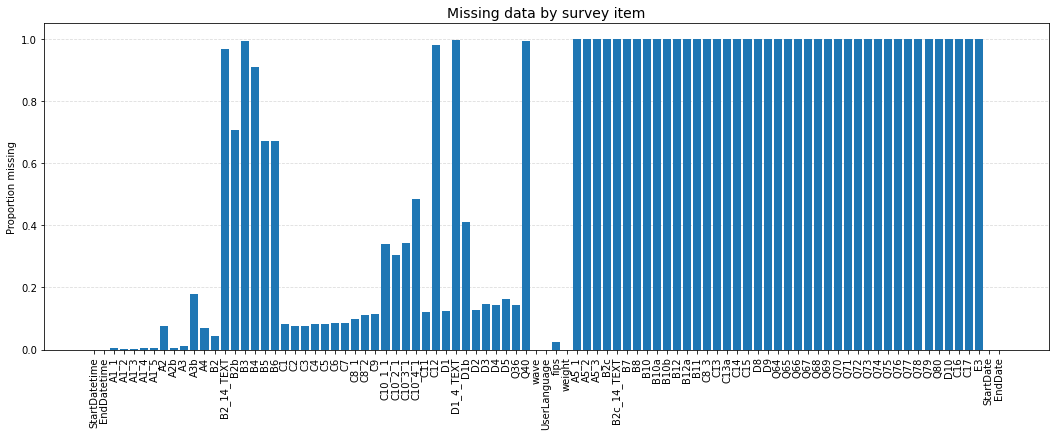

In [17]:
missing_data_plot(x, y)

Many survey items are missing for most of the dataset. There are two main reasons for this:
1. These survey items were not included in waves 1-3. It seems to be true of all items from **A5_1:E3**. It would be best to remove them from the dataframe.
2. These are skip questions which depend on whether a respondent has answered a previous question for eg. whether or not they had fever in the past 5 days. These items should be retained.

#### Removing items with no data

In [18]:
len(fb.columns)

91

In [19]:
cols_to_remove = [col for col in fb.columns if fb[col].isna().sum() == len(fb)]
fb = fb.drop(cols_to_remove, axis=1)

In [20]:
len(fb.columns)

50

Dropped 41 columns. Let's check the missing data plot again.

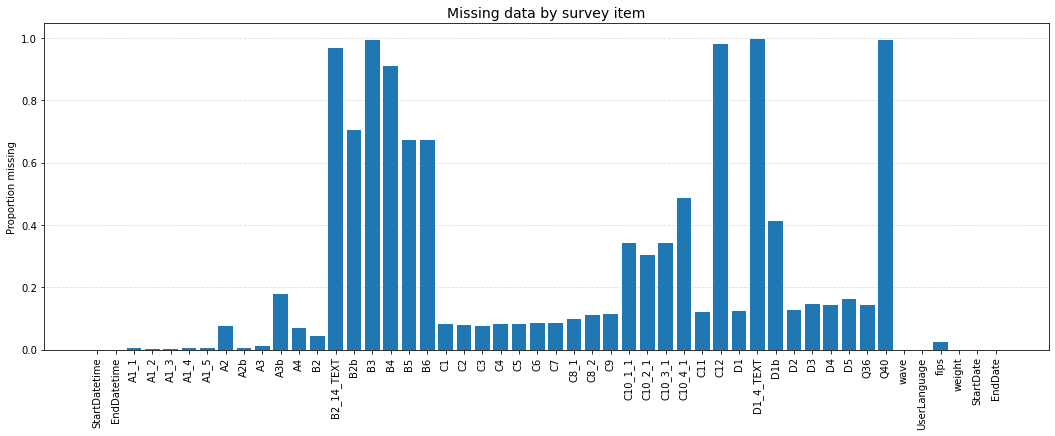

In [21]:
x = fb.isna().sum().index
y = fb.isna().sum().values / len(fb)
missing_data_plot(x, y)

Now, to investigate missingness in every survey item based on skip questions (where applicable) to get a better sense of the data

#### Items to be responded by all

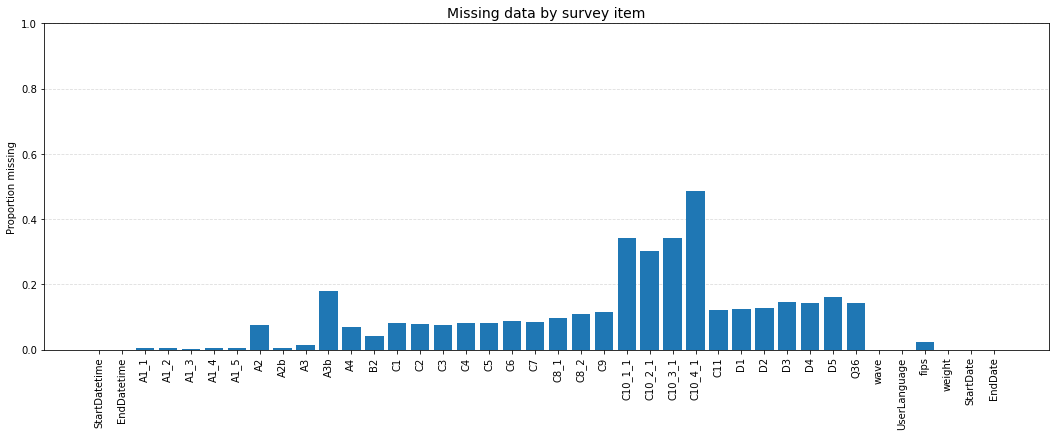

In [22]:
cols_for_all = ['StartDatetime', 'EndDatetime','A1_1', 'A1_2', 'A1_3', 'A1_4', 'A1_5', 'A2', 'A2b', 'A3', 'A3b', 'A4', 'B2', 'C1', 'C2', 'C3', 'C4', 
                'C5', 'C6', 'C7', 'C8_1', 'C8_2', 'C9', 'C10_1_1', 'C10_2_1', 'C10_3_1', 'C10_4_1', 'C11', 'D1', 'D2', 
                'D3', 'D4', 'D5', 'Q36', 'wave', 'UserLanguage', 'fips', 'weight', 'StartDate', 'EndDate']
y = fb[cols_for_all].isna().sum().values / len(fb)
x = fb[cols_for_all].isna().sum().index
missing_data_plot(x, y)

- The items C_10_1:C_10_4 have low response. These items relate to: <br>
<blockquote>'In the past 24 hours, with how many people have you had direct contact, outside of your household?</blockquote>
- Among other items there appears to be a trend of increasing missingness for later questions. These will have to be investigated while analyzing these data.
- Unfortunately, A3b has high missingness. This items deals with the location of the respondent and is important for our analysis.

#### Example of missingness for items based on skip questions

In [23]:
spec_cols = [col for col in fb.columns if col not in cols_for_all]
spec_cols

['B2_14_TEXT', 'B2b', 'B3', 'B4', 'B5', 'B6', 'C12', 'D1_4_TEXT', 'D1b', 'Q40']

I will examine missingness for B3 and Q40 which are follow up responses to B2 in which 'fever' is selected as at least one of the multiple options: <br>
<blockquote>In the past 24 hours, have you personally experienced any of the following
symptoms? (Select all that apply.)</blockquote>

In [24]:
indexes = []
for x in fb.B2.value_counts().index:
    if str(x).startswith('1,'):
        indexes.append(x)
fever = fb.loc[fb.B2.isin(indexes)]
fever = fever.append(fb.loc[fb.B2=='1'])

In [25]:
print(f'Proportion of missing values for Item B3: {(fever.B3.isna().sum() / len(fever)).round(4)}')
print(f'Proportion of missing values for Item Q40: {(fever.Q40.isna().sum() / len(fever)).round(4)}')

Proportion of missing values for Item B3: 0.1472
Proportion of missing values for Item Q40: 0.3382


Item B3 is a categorical Yes/No response to:<br>
<blockquote>You mentioned that you had a fever in the past 24 hours. Have you taken your temperature?</blockquote><br>
Item Q40 is a continuous response (temperature F):<br>
<blockquote>What was your highest temperature, in °F?</blockquote><br>
In this dataset it seems that items requiring input of a continous numeric value are less likely to be answered.

#### Row missingness over time

Will restrict analysis for items expected to be answered by all

In [26]:
fb['resp_miss'] = fb[cols_for_all].apply(lambda x: len(cols_for_all) - x.count(), axis=1)

In [27]:
y = fb['resp_miss'].groupby(fb['StartDate']).mean()

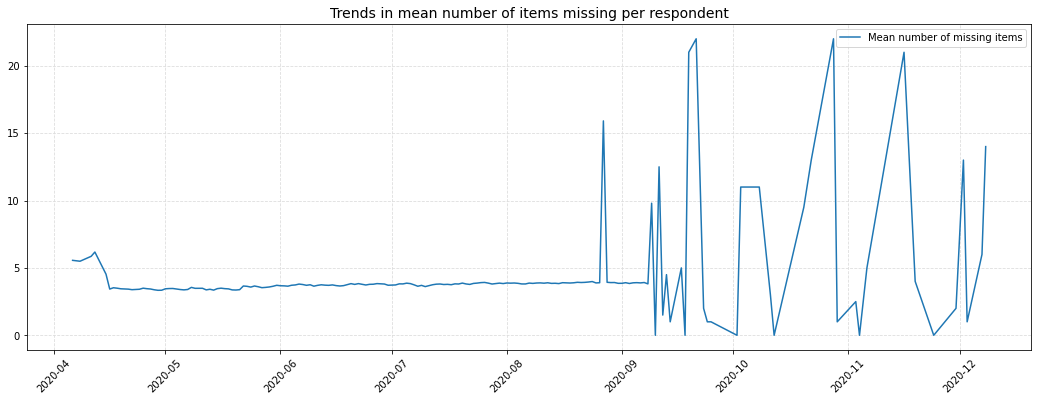

In [28]:
plt.figure(figsize=(18,6))
plt.plot(y.index, y.values, label='Mean number of missing items')
plt.xticks(rotation=45)
plt.legend()
plt.title('Trends in mean number of items missing per respondent', fontsize=14)
plt.grid(b=True, which='major', color='#DDD', linestyle='--')
plt.show()

Missing data by columns over time can also be analyzed in a similar manner.

<a id="4"></a><br>
### <font color='#045FB4'>Survey weights</font>

Weights should be applied as suggested in the official documentation for the survey [Weight and Methodology Brief for the COVID-19 Symptom Survey](https://covidmap.umd.edu/document/css_methods_brief.pdf).<br>
<blockquote>Survey weights are fairly straightforward to use and many types of analyses can be easilyadapted to work with a weighted sample.  We provide guidance for the three most commonestimators.  To the best of our knowledge, these estimators will fully address the needs in this initiative.</blockquote><br>

**Population mean** <br><br>
\begin{equation*}
\hat{y} = \frac {\sum \limits _{j \in S} w_j y_j}{\sum \limits _{j \in S} w_j}
\end{equation*}

**Population total** <br><br>
\begin{equation*}
\hat{t} = {\sum \limits _{j \in S} w_j y_j}
\end{equation*}

**Population ratio**<br><br>
\begin{equation*}
\hat{r} = \frac {\sum \limits _{j \in S} w_j y_j}{\sum \limits _{j \in S} w_j z_j}
\end{equation*}

For example, $y_{j}$= 1 if the respondent has qualifying COVID symptoms, in a geographical region $z_{j}$= 1 if the respondent is in the target region.

#### How much difference do weights make?

**Example: Item D1**<br>
<blockquote>What is your gender?</blockquote>

In [29]:
tab(fb, 'D1')

,Cat,Freq,Prop
0,Female,5929271,0.5736
1,Male,2941737,0.2846
2,NA,1282429,0.1241
3,Non-binary,40012,0.0039
4,Prefer not to answer,103455,0.0100
5,Prefer to self describe,39784,0.0038


In [30]:
wtab(fb, 'D1')

,Cat,Freq,Prop
0,Female,5929271,0.4425
1,Male,2941737,0.3975
2,NA,1282429,0.1388
3,Non-binary,40012,0.0045
4,Prefer not to answer,103455,0.0115
5,Prefer to self describe,39784,0.0054


- The unweighted and weighted tabulations show vastly different proportions for males and females
- Although, this is one example, it already indicates that weights will be important to consider

<a id="5"></a><br>
### <font color='#045FB4'>Continuous variables</font>

Continuous variables have a higher proportion of missing data. It is also important to check for the range of data. Two examples are shown here.<br>
<blockquote><b>A2b</b> How many people are there in your household in total (including yourself)?</blockquote><br>
<blockquote><b>C10</b> In the past 24 hours, with how many people have you had direct contact, outside of your
household? At work (1)</blockquote>

In [31]:
wstats(fb, 'A2b')

Total number of observations: 10272370
Weighted Mean: inf
Standard Deviation: nan
Maximum: inf
Minimum: 0.0


- A small proportion of data is missing for item A2b
- A maximum of 'inf' or infinity is not possible
<br><br>
Let's reduce the maximum range value to something more feasible and check.

In [32]:
wstats(fb.loc[fb.A2b < 20], 'A2b')

Total number of observations: 10206275
Weighted Mean: 2.987
Standard Deviation: 1.673
Maximum: 19.0
Minimum: 0.0


Much better. But missing ~66,000 more observations.

In [33]:
wstats(fb, 'C10_1_1')

Total number of observations: 6813610
Weighted Mean: inf
Standard Deviation: nan
Maximum: inf
Minimum: 0.0


- 34% of observations are missing
- The range is not feasible

***
Any analysis using continuous variables should **perform further quality checks** on the variables and check for feasible ranges.
***

<a id="6"></a><br>
## <font color='#045FB4'>3. Waves 1-3: Tabulations</font>

Selected items will be tabulated for illustration and for getting a better understanding of the data. This won't be exhaustive of the entire survey but the analysis can be extended easily as needed.

<a id="7"></a><br>
### <font color='#045FB4'>Tabulation by item</font>

#### Items A.

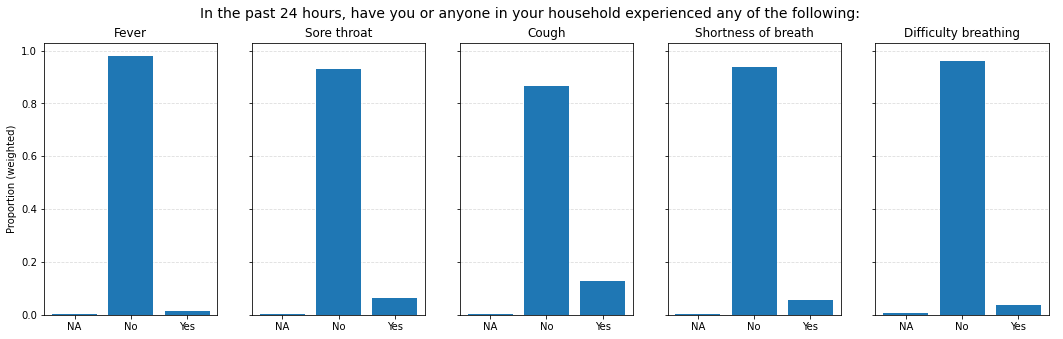

In [34]:
cols = ['A1_1', 'A1_2', 'A1_3', 'A1_4', 'A1_5']
tls = ['Fever', 'Sore throat', 'Cough', 'Shortness of breath', 'Difficulty breathing']
fig, ax = plt.subplots(1, 5, figsize=(18, 5), sharey=True)
ax = ax.flatten()
for i, x in enumerate(ax):
    x.bar(wtab(fb, cols[i])['Cat'], wtab(fb, cols[i])['Prop'])
    x.set_title(tls[i])
    x.grid(which='major', axis='y', color='#DDD', linestyle='--')
plt.suptitle("In the past 24 hours, have you or anyone in your household experienced any of the following:", fontsize=14)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Proportion (weighted)')
plt.show()

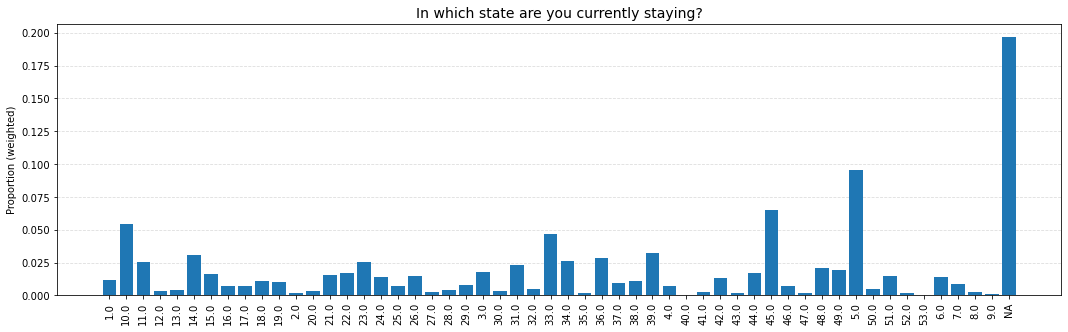

In [35]:
plt.figure(figsize=(18,5))
plt.bar(wtab(fb, 'A3b')['Cat'], wtab(fb, 'A3b')['Prop'])
plt.title("In which state are you currently staying?", fontsize=14)
plt.grid(axis='y', which='major', color='#DDD', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Proportion (weighted)')
plt.show()

- Option '53.0' codes the data for respondents who do not reside in the United States. A very small proportion of respondents are included in this.
- Large proportion of NA values. This should be clarified with the survey group

#### Items B.

In [36]:
cindexes = []
for x in fb.B2.value_counts().index:
    if ',2,' in str(x) or str(x).startswith('2,'):
        cindexes.append(x)
cough = fb.loc[fb.B2.isin(cindexes)]
cough = cough.append(fb.loc[fb.B2=='2'])

In [37]:
symptom = fb.loc[(fb.B2!='15') & (fb.B2.notna())]

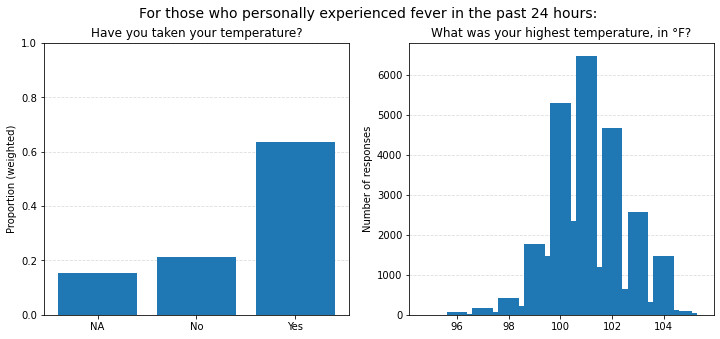

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(wtab(fever, 'B3')['Cat'], wtab(fever, 'B3')['Prop'])
ax[0].set_ylabel('Proportion (weighted)')
ax[0].set_title('Have you taken your temperature?')
ax[0].grid(which='major', axis='y', color='#DDD', linestyle='--')
ax[0].set_yticks(np.arange(0, 1.1, 0.2))
ax[1].bar(fever.Q40.loc[(fever.Q40 > 95) & (fever.Q40 < 105)].value_counts().index, fever.Q40.loc[(fever.Q40 > 95) & (fever.Q40 < 105)].value_counts().values)
ax[1].set_title('What was your highest temperature, in °F?')
ax[1].grid(which='major', axis='y', color='#DDD', linestyle='--')
ax[1].set_ylabel('Number of responses')
plt.suptitle("For those who personally experienced fever in the past 24 hours:", fontsize=14)
plt.show()

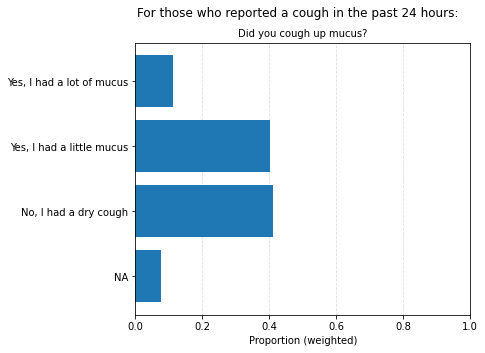

In [39]:
plt.figure(figsize=(6,5))
plt.barh(wtab(cough, 'B4')['Cat'], wtab(cough, 'B4')['Prop'])
plt.suptitle('For those who reported a cough in the past 24 hours:', fontsize=12)
plt.title('Did you cough up mucus?', fontsize=10)
plt.xlabel('Proportion (weighted)')
plt.grid(which='major', axis='x', color='#DDD', linestyle='--')
plt.xticks(np.arange(0, 1.1, 0.2))
plt.show()

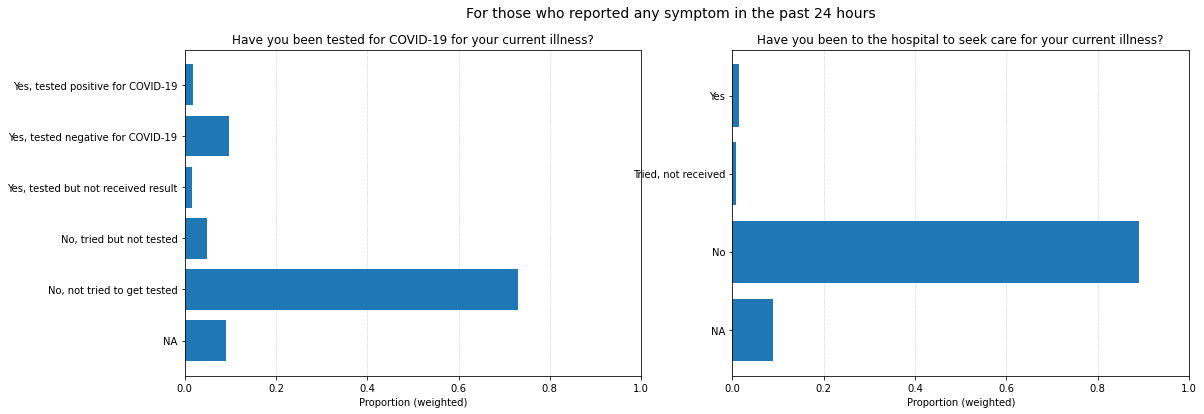

In [40]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].barh(wtab(symptom, 'B5')['Cat'], wtab(symptom, 'B5')['Prop'])
ax[0].set_title('Have you been tested for COVID-19 for your current illness?')
ax[0].grid(which='major', axis='x', color='#DDD', linestyle='--')
ax[0].set_xlabel('Proportion (weighted)')
ax[0].set_xticks(np.arange(0, 1.1, 0.2))
ax[1].barh(wtab(symptom, 'B6')['Cat'], wtab(symptom, 'B6')['Prop'])
ax[1].set_title('Have you been to the hospital to seek care for your current illness?')
ax[1].grid(which='major', axis='x', color='#DDD', linestyle='--')
ax[1].set_xlabel('Proportion (weighted)')
ax[1].set_xticks(np.arange(0, 1.1, 0.2))
plt.suptitle('For those who reported any symptom in the past 24 hours', fontsize=14)
plt.show()

#### Items C.

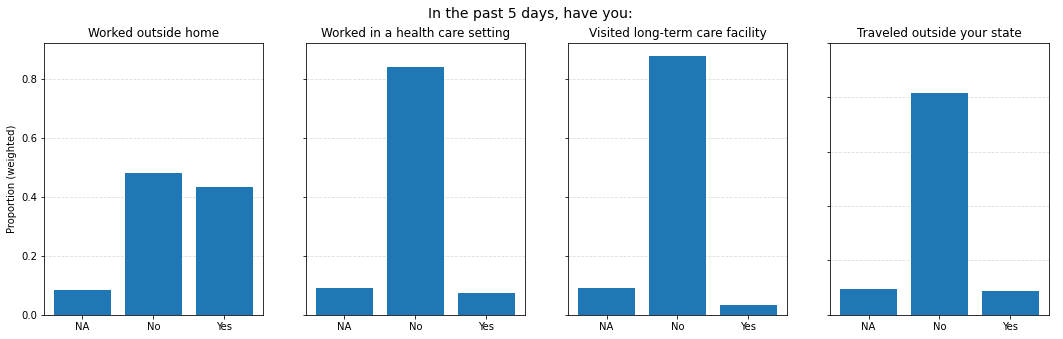

In [41]:
cols = ['C3', 'C4', 'C5', 'C6']
tls = ['Worked outside home', 'Worked in a health care setting', 'Visited long-term care facility', 'Traveled outside your state']
fig, ax = plt.subplots(1, 4, figsize=(18, 5), sharey=True)
ax = ax.flatten()
for i, x in enumerate(ax):
    x.bar(wtab(fb, cols[i])['Cat'], wtab(fb, cols[i])['Prop'])
    x.set_title(tls[i], fontsize=12)
    x.grid(which='major', axis='y', color='#DDD', linestyle='--')
    x.set_yticks(np.arange(0, 1.1, 0.2))
plt.suptitle("In the past 5 days, have you:", fontsize=14)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Proportion (weighted)')
plt.show()

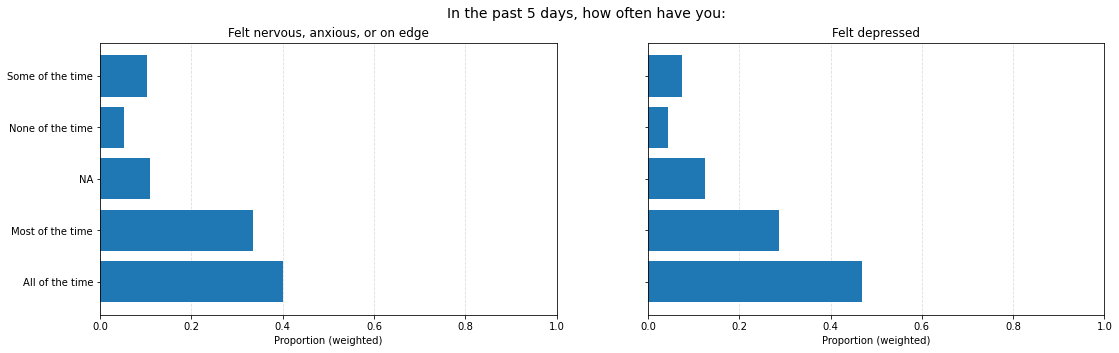

In [42]:
cols = ['C8_1', 'C8_2']
tls = ['Felt nervous, anxious, or on edge', 'Felt depressed']
fig, ax = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
ax = ax.flatten()
for i, x in enumerate(ax):
    x.barh(wtab(fb, cols[i])['Cat'], wtab(fb, cols[i])['Prop'])
    x.set_title(tls[i], fontsize=12)
    x.set_xlabel('Proportion (weighted)')
    x.grid(which='major', axis='x', color='#DDD', linestyle='--')
    x.set_xticks(np.arange(0, 1.1, 0.2))
plt.suptitle("In the past 5 days, how often have you:", fontsize=14)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.show()

***
Nearly **three-quarters of respondents** reported feeling 'depressed' and 'nervous, anxious or on edge'.
***

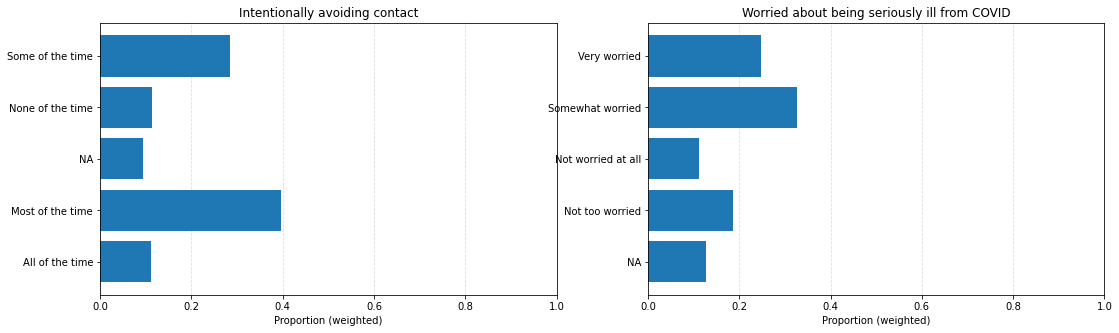

In [43]:
cols = ['C7', 'C9']
tls = ['Intentionally avoiding contact', 'Worried about being seriously ill from COVID']
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax = ax.flatten()
for i, x in enumerate(ax):
    x.barh(wtab(fb, cols[i])['Cat'], wtab(fb, cols[i])['Prop'])
    x.set_title(tls[i], fontsize=12)
    x.set_xlabel('Proportion (weighted)')
    x.grid(which='major', axis='x', color='#DDD', linestyle='--')
    x.set_xticks(np.arange(0, 1.1, 0.2))
plt.show()

#### Items D.

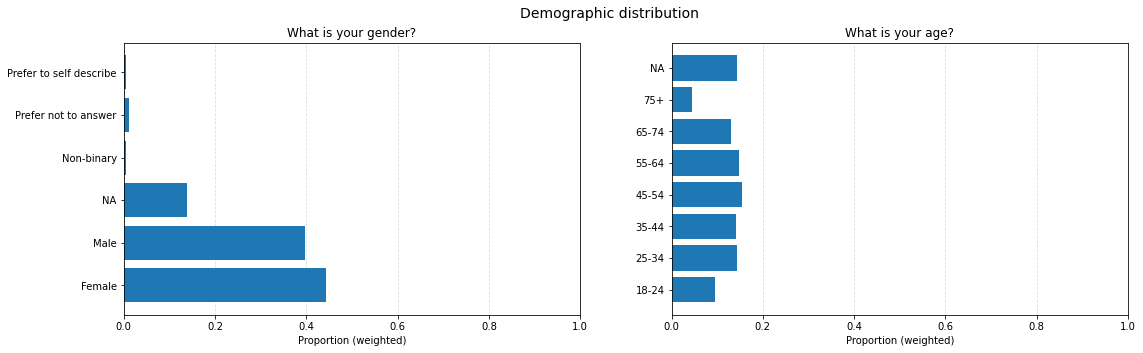

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax[0].barh(wtab(fb, 'D1')['Cat'], wtab(fb, 'D1')['Prop'])
ax[0].set_xlabel('Proportion (weighted)')
ax[0].set_title('What is your gender?')
ax[0].grid(which='major', axis='x', color='#DDD', linestyle='--')
ax[0].set_xticks(np.arange(0, 1.1, 0.2))
ax[1].barh(wtab(fb, 'D2')['Cat'], wtab(fb, 'D2')['Prop'])
ax[1].set_title('What is your age?')
ax[1].grid(which='major', axis='x', color='#DDD', linestyle='--')
ax[1].set_xlabel('Proportion (weighted)')
ax[1].set_xticks(np.arange(0, 1.1, 0.2))
plt.suptitle("Demographic distribution", fontsize=14)
plt.show()

In [45]:
wstats(fb.loc[fb.D4<10], 'D4')

Total number of observations: 8838560
Weighted Mean: 1.485
Standard Deviation: 1.269
Maximum: 9.5
Minimum: 0.0


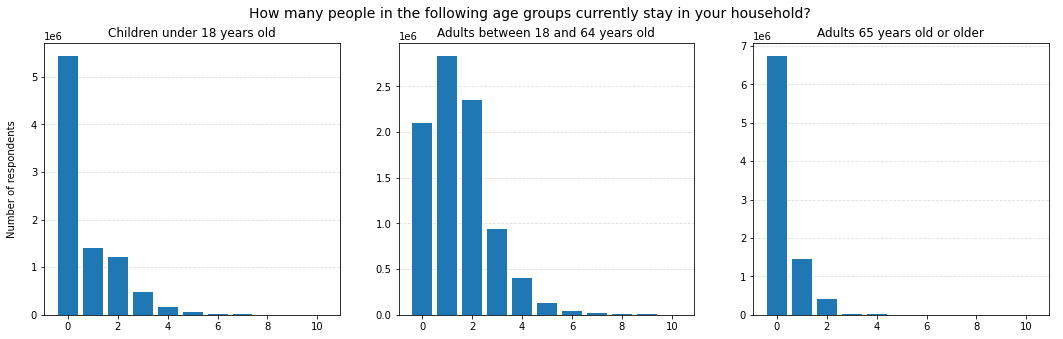

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
ax[0].bar(fb.D3.loc[(fb.D3<10)].value_counts().index, fb.D3.loc[(fb.D3<10)].value_counts().values)
ax[0].set_title('Children under 18 years old')
ax[0].grid(which='major', axis='y', color='#DDD', linestyle='--')
ax[1].bar(fb.D4.loc[(fb.D4<10)].value_counts().index, fb.D4.loc[(fb.D4<10)].value_counts().values)
ax[1].set_title('Adults between 18 and 64 years old')
ax[1].grid(which='major', axis='y', color='#DDD', linestyle='--')
ax[2].bar(fb.D5.loc[(fb.D5<10)].value_counts().index, fb.D5.loc[(fb.D5<10)].value_counts().values)
ax[2].set_title('Adults 65 years old or older')
ax[2].grid(which='major', axis='y', color='#DDD', linestyle='--')
plt.suptitle('How many people in the following age groups currently stay in your household?', fontsize=14)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel('Number of respondents')
plt.show()

#### Finances

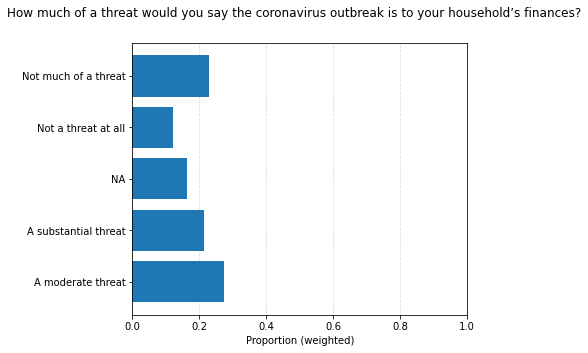

In [47]:
plt.figure(figsize=(6,5))
plt.barh(wtab(fb, 'Q36')['Cat'], wtab(fb, 'Q36')['Prop'])
plt.suptitle('How much of a threat would you say the coronavirus outbreak is to your household’s finances?')
plt.xlabel('Proportion (weighted)')
plt.grid(which='major', axis='x', color='#DDD', linestyle='--')
plt.xticks(np.arange(0, 1.1, 0.2))
plt.show()

<a id="8"></a><br>
### <font color='#045FB4'>Cross tabulations</font>

The focus will be on some cross tabulations with gender and age.

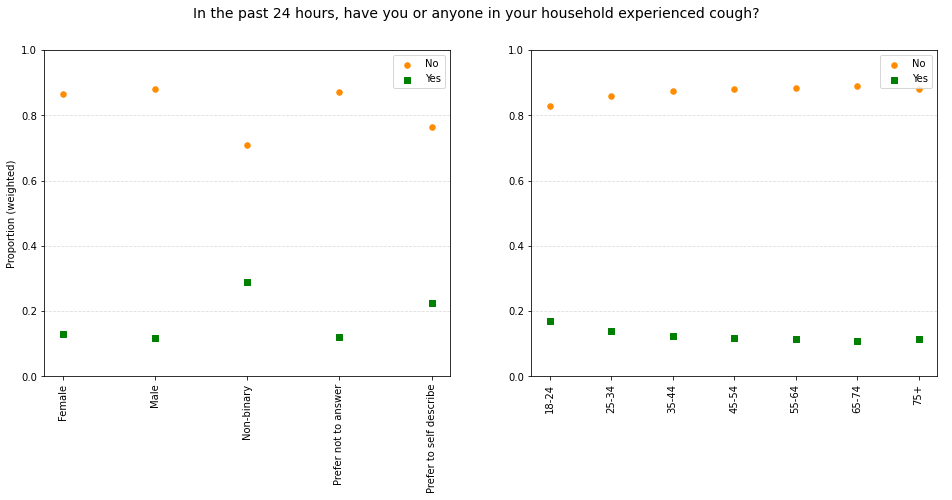

In [48]:
d = wcrosstab(fb, 'D1', 'A1_3')
a = wcrosstab(fb, 'D2', 'A1_3')
suptitle = 'In the past 24 hours, have you or anyone in your household experienced cough?'
cross_plot(d, a, 'A1_3', suptitle)

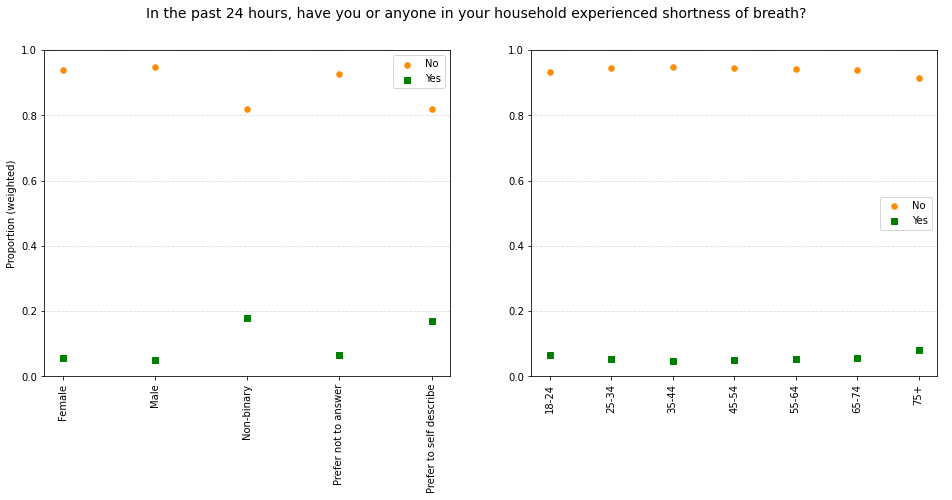

In [49]:
d = wcrosstab(fb, 'D1', 'A1_4')
a = wcrosstab(fb, 'D2', 'A1_4')
suptitle = 'In the past 24 hours, have you or anyone in your household experienced shortness of breath?'
cross_plot(d, a, 'A1_4', suptitle)

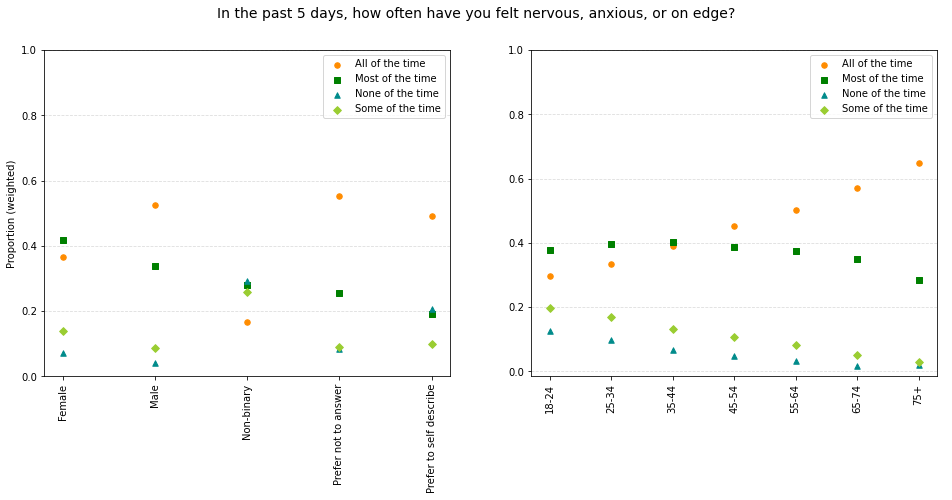

In [50]:
col = 'C8_1'
d = wcrosstab(fb, 'D1', col)
a = wcrosstab(fb, 'D2', col)
suptitle = 'In the past 5 days, how often have you felt nervous, anxious, or on edge?'
cross_plot(d, a, col, suptitle)

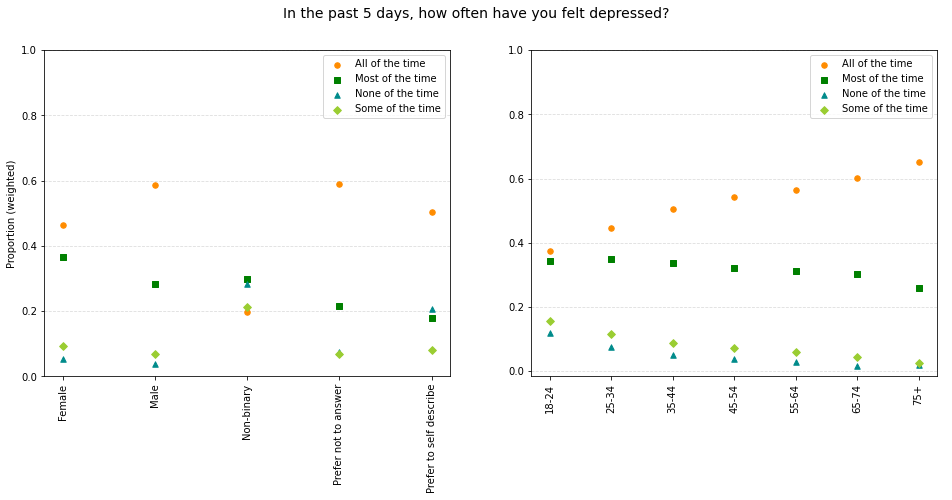

In [51]:
col = 'C8_2'
d = wcrosstab(fb, 'D1', col)
a = wcrosstab(fb, 'D2', col)
suptitle = 'In the past 5 days, how often have you felt depressed?'
cross_plot(d, a, col, suptitle)

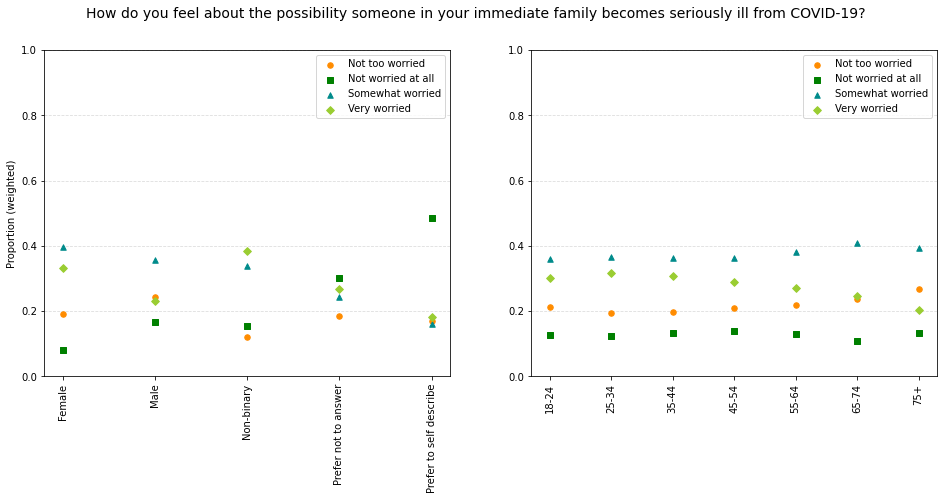

In [52]:
col = 'C9'
d = wcrosstab(fb, 'D1', col)
a = wcrosstab(fb, 'D2', col)
suptitle = 'How do you feel about the possibility someone in your immediate family becomes seriously ill from COVID-19?'
cross_plot(d, a, col, suptitle)

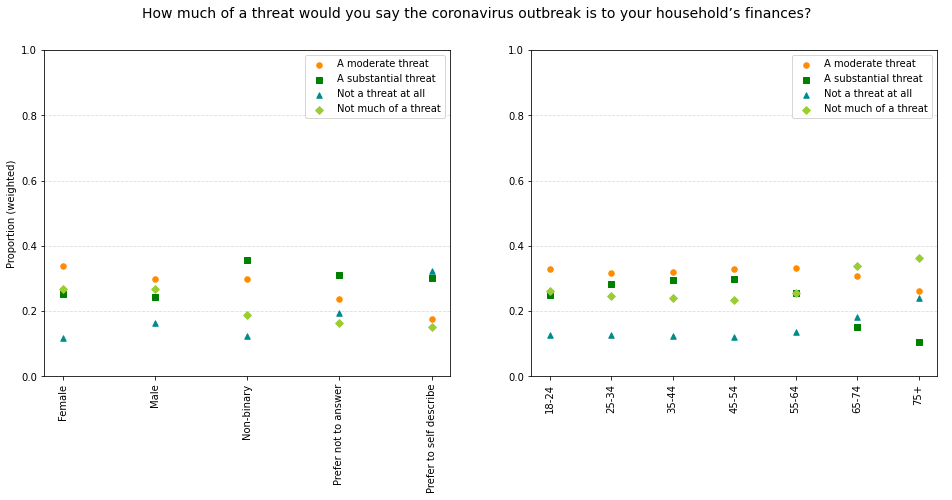

In [53]:
col = 'Q36'
d = wcrosstab(fb, 'D1', col)
a = wcrosstab(fb, 'D2', col)
suptitle = "How much of a threat would you say the coronavirus outbreak is to your household’s finances?"
cross_plot(d, a, col, suptitle)

In [54]:
fb['has_symptom'] = np.where(fb.B2.notna(), 'Yes', 'No')
fb.loc[fb.B2=='15', 'has_symptom'] = 'No'

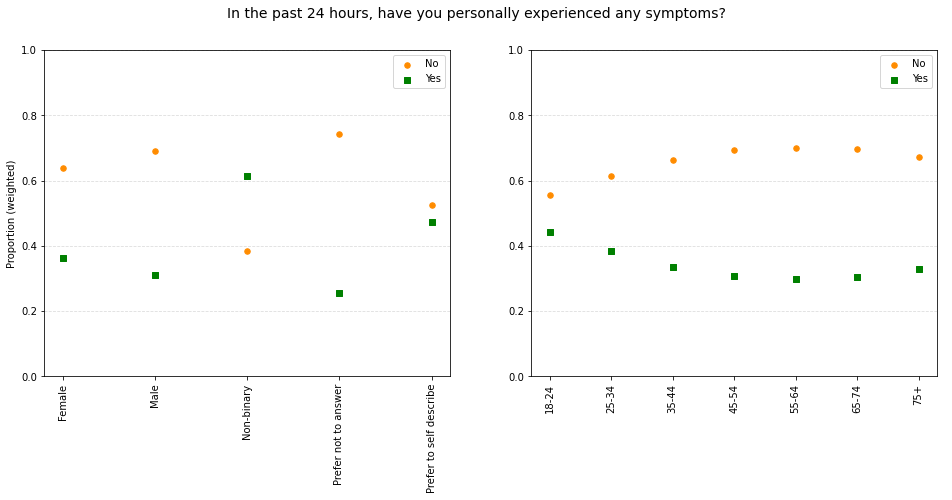

In [55]:
col = 'has_symptom'
d = wcrosstab(fb, 'D1', col)
a = wcrosstab(fb, 'D2', col)
suptitle = "In the past 24 hours, have you personally experienced any symptoms?"
cross_plot(d, a, col, suptitle)

<a id="9"></a><br>
## <font color='#045FB4'>4. Waves 1-3: Trends</font>

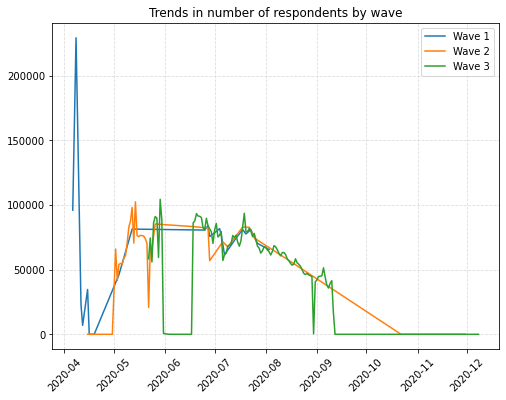

In [56]:
col='wave'
wave_labels = ['Wave 1', 'Wave 2', 'Wave 3']
title = 'Trends in number of respondents by wave'
trends_plot(fb, col, 'Freq', wave_labels, title)

Sample sizes for the first three waves are small from August. Therefore, we can just keep the data till August 15, 2020 for the trends analysis.

#### Filtering dataframe for dates between April 6 and August 15

In [57]:
startdate = pd.to_datetime("2020-04-06").date()
enddate = pd.to_datetime("2020-08-16").date()
mask = (fb['StartDate'] >= startdate) & (fb['StartDate'] < enddate)
fbt = fb.loc[mask]
print(f'Date range for trends dataset is from {fbt.StartDate.min()} to {fbt.StartDate.max()}')

Date range for trends dataset is from 2020-04-06 to 2020-08-15


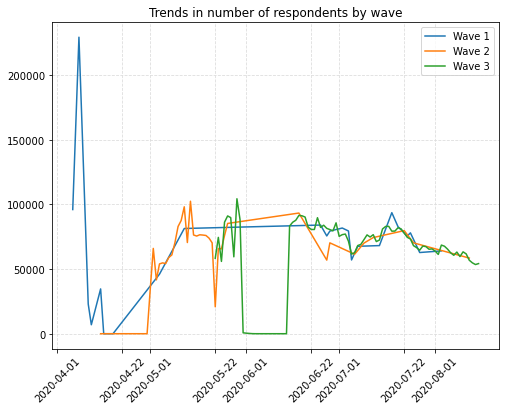

In [58]:
col='wave'
wave_labels = ['Wave 1', 'Wave 2', 'Wave 3']
title = 'Trends in number of respondents by wave'
trends_plot(fbt, col, 'Freq', wave_labels, title)

#### Trends in selected individual items

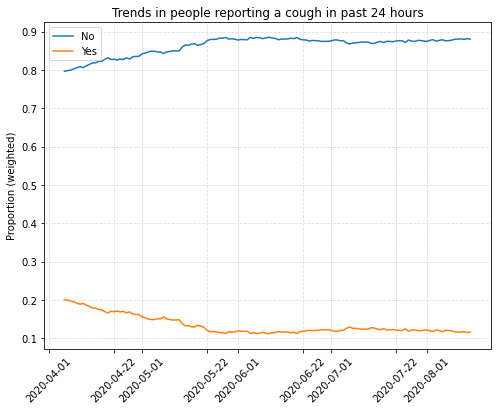

In [59]:
col='A1_3'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = 'Trends in people reporting a cough in past 24 hours'
trends_plot(fbt, col, 'Prop', col_labels, title)

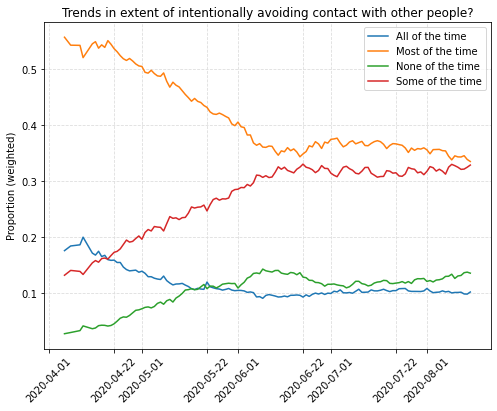

In [60]:
col='C7'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = 'Trends in extent of intentionally avoiding contact with other people?'
trends_plot(fbt, col, 'Prop', col_labels, title)

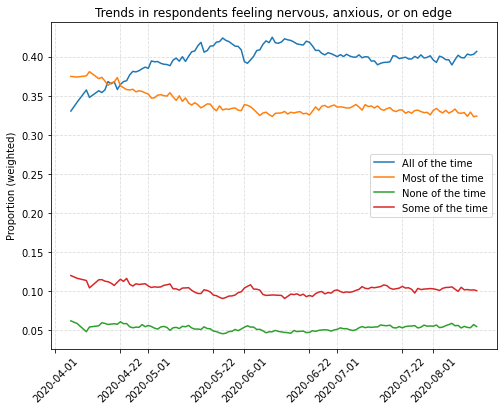

In [61]:
col='C8_1'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = 'Trends in respondents feeling nervous, anxious, or on edge'
trends_plot(fbt, col, 'Prop', col_labels, title)

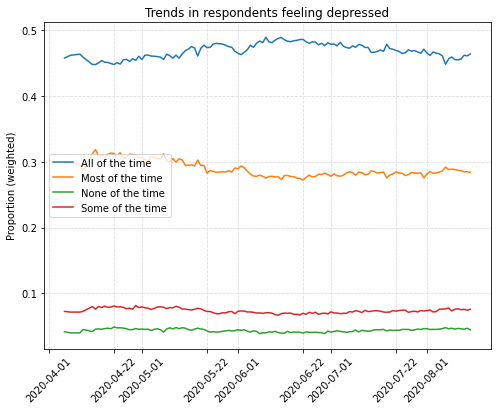

In [62]:
col='C8_2'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = 'Trends in respondents feeling depressed'
trends_plot(fbt, col, 'Prop', col_labels, title)

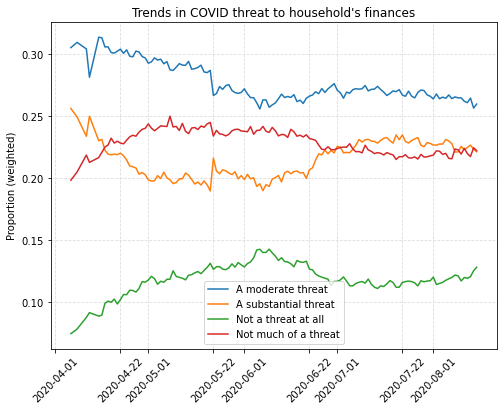

In [63]:
col='Q36'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = "Trends in COVID threat to household's finances"
trends_plot(fbt, col, 'Prop', col_labels, title)

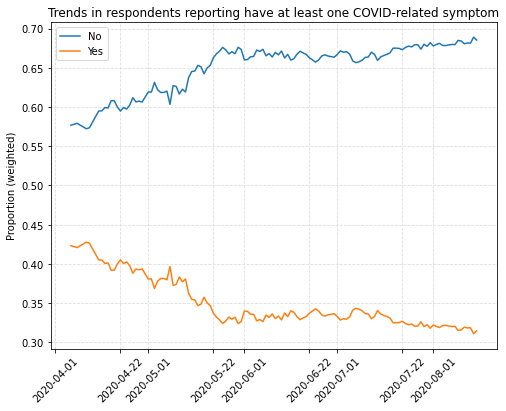

In [64]:
col='has_symptom'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = "Trends in respondents reporting have at least one COVID-related symptom"
trends_plot(fbt, col, 'Prop', col_labels, title)

#### Demographic distribution over time

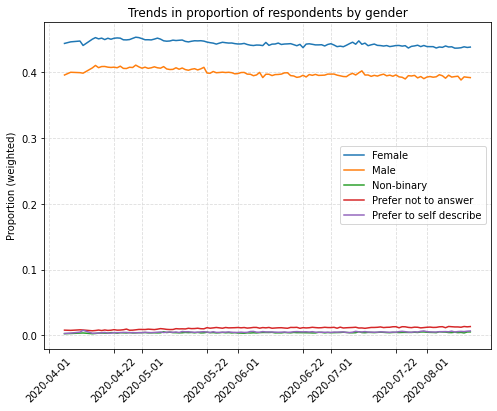

In [65]:
col='D1'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = "Trends in proportion of respondents by gender"
trends_plot(fbt, col, 'Prop', col_labels, title)

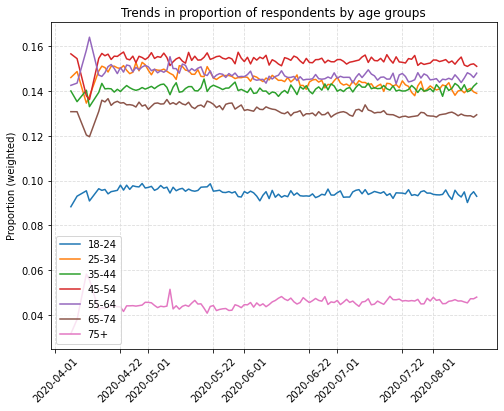

In [66]:
col='D2'
col_labels = fbt[col].value_counts().sort_index().index.to_list()
title = "Trends in proportion of respondents by age groups"
trends_plot(fbt, col, 'Prop', col_labels, title)

#### Trends in items by gender and age

The analysis in this section is restricted to using **Yes/No** response items. All graphs are stratified by gender and age groups as specified in the survey instrument.

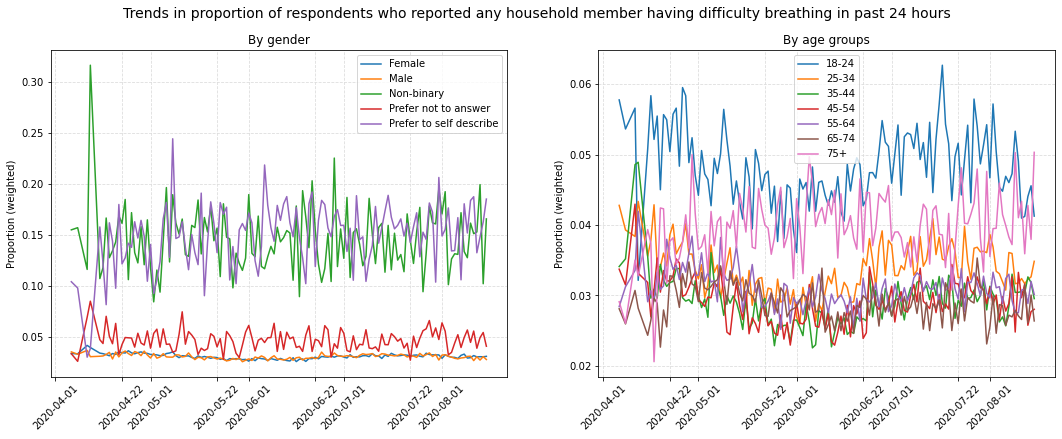

In [67]:
col1='D1'
col2='A1_5'
col3='D2'
title = "Trends in proportion of respondents who reported any household member having difficulty breathing in past 24 hours"
cross_trends_plot(fbt, col1, col2, col3, title)

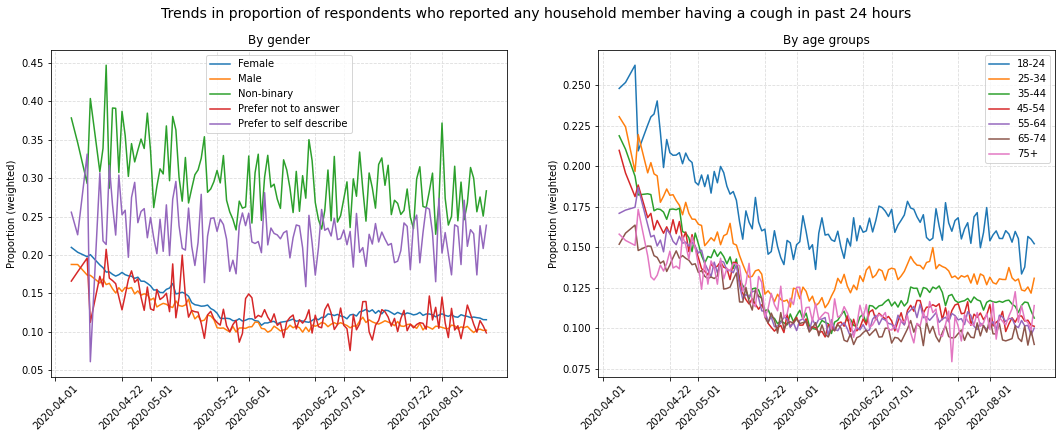

In [68]:
col1='D1'
col2='A1_3'
col3='D2'
title = "Trends in proportion of respondents who reported any household member having a cough in past 24 hours"
cross_trends_plot(fbt, col1, col2, col3, title)

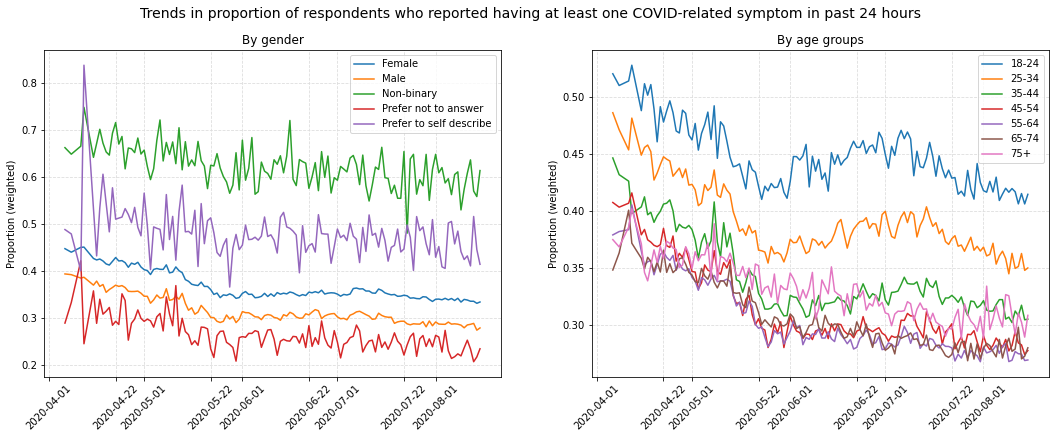

In [69]:
col1='D1'
col2='has_symptom'
col3='D2'
title = "Trends in proportion of respondents who reported having at least one COVID-related symptom in past 24 hours"
cross_trends_plot(fbt, col1, col2, col3, title)

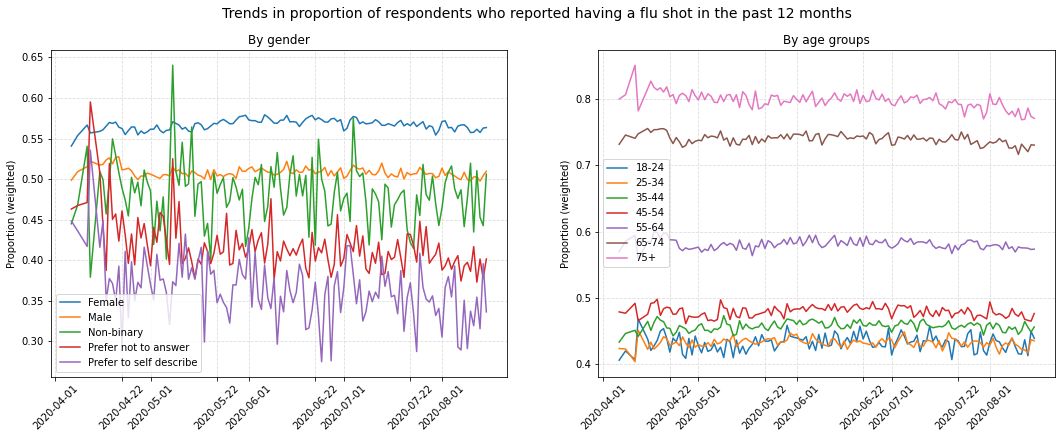

In [70]:
col1='D1'
col2='C2'
col3='D2'
title = "Trends in proportion of respondents who reported having a flu shot in the past 12 months"
cross_trends_plot(fbt, col1, col2, col3, title)

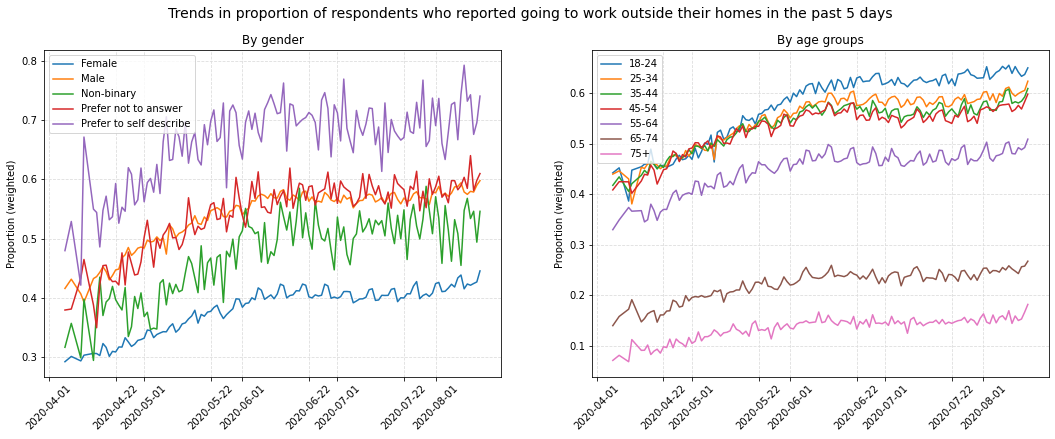

In [71]:
col1='D1'
col2='C3'
col3='D2'
title = "Trends in proportion of respondents who reported going to work outside their homes in the past 5 days"
cross_trends_plot(fbt, col1, col2, col3, title)

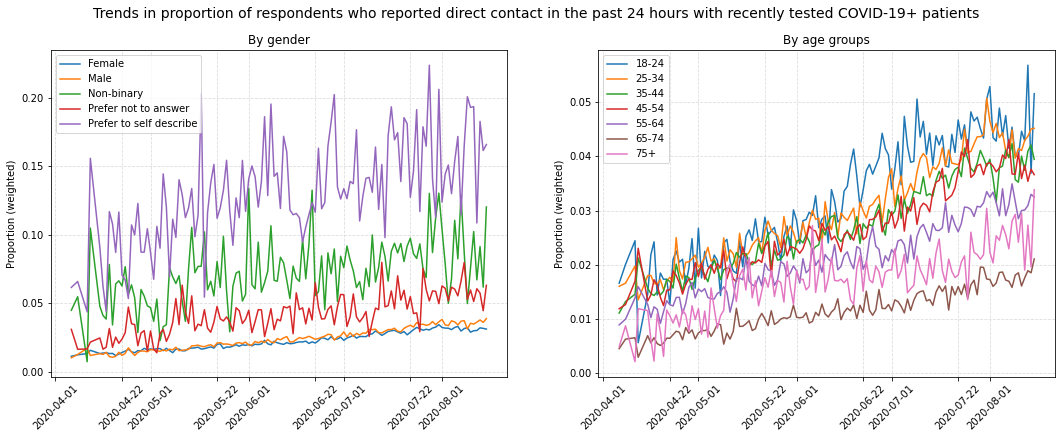

In [72]:
col1='D1'
col2='C11'
col3='D2'
title = "Trends in proportion of respondents who reported direct contact in the past 24 hours with recently tested COVID-19+ patients"
cross_trends_plot(fbt, col1, col2, col3, title)

<a id="10"></a><br>
## <font color='#045FB4'>5. Key messages</font>

#### Limitations
- Analyzed Waves 1-3 excluding Waves 4-5 for version 1.0. This included 10.3 million of 14.1 million respondents from the consolidated dataset available as of 11 December 2020.
- Selected survey items were analyzed to understand the dataset. A more comprehensive analysis should follow.
- Correcting errors in code and optimization of code might be needed.
- Messages inferred from this initial EDA will need to be refined with a comprehensive analysis of the dataset.

***
#### Key messages
- Number of daily survey respondents has been decreasing since the survey started in April. 
- This particular dataset must be the one focused on the United States since it did not contain many respondents from outside the United States. Also, nearly 20% of region/state of residence data is missing.
- Continuous numeric response items have higher missing rates and have infeasible ranges of data. Therefore, any analysis using continuous variables should carefully check for quality.
- Survey weights are important and should be applied as instructed in the documentation.
- Results from Waves 1-3 indicate that most respondents have been worried and/or depressed with regards to the impact of COVID-19 since April 2020. This has varied, especially, across age groups with older people more likely to consider COVID-19 to have an impact.
- Fewer proportion of respondents have reported symptoms over time (April-August 2020). A higher proportion have started working from outside their homes over time even as a higher proportion of respondents reported direct contact with COVID-19+ patients since April.
***